# Ejercicio 3

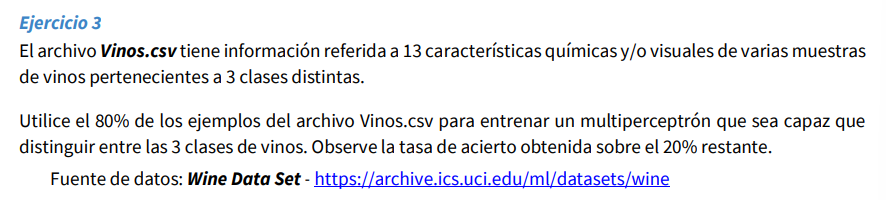

### Lectura de datos e importe de librerias

In [1]:

# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [4]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

nombre_archivo = DATOS_DIR + 'Vinos.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'], sep=';')

df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics, model_selection

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
from sklearn.neural_network import MLPClassifier
from Funciones import evaluar, evaluarDerivada

### Division en x,y, train, test

In [8]:
df['Class'].unique()

array([1, 2, 3], dtype=int64)

In [29]:
X = np.array(df.iloc[:, 1:])
Y = np.array(df['Class'])

In [30]:
entradas = X.shape[1]
salidas = len(np.unique(Y))
print(entradas)
print (salidas)

13
3


In [31]:
#conjuntos de entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( \
        X,Y, test_size=0.20)#, random_state=42)

normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

In [33]:
clf = MLPClassifier(solver='sgd', learning_rate_init=0.05,
                    hidden_layer_sizes=(2,), random_state=1,
                    max_iter=2000, 
                    verbose=False,  tol=1.0e-05,
                    activation='tanh')

history = clf.fit(X_train,Y_train)

Puse parametros como los del profe (MLP_IRIS_RN)

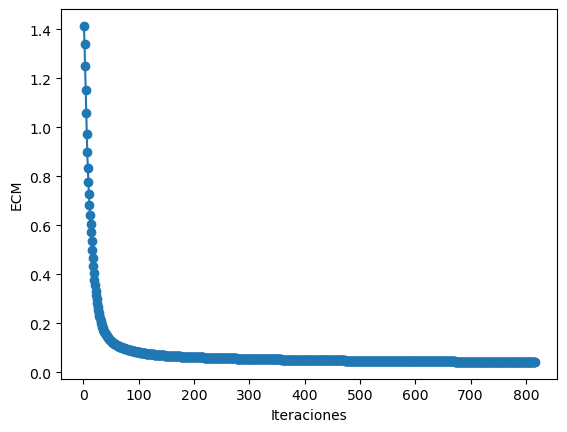

In [34]:
plt.plot(range(1, len(history.loss_curve_) + 1), history.loss_curve_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

In [35]:
Y_pred = clf.predict(X_train)
print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_train,Y_pred))

% aciertos X_train : 0.993


In [36]:
Y_pred[:5]

array([3, 3, 3, 1, 3], dtype=int64)

In [37]:
report = metrics.classification_report(Y_train,Y_pred)
print("Confusion matrix Training:\n%s" % report) 

Confusion matrix Training:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        54
           2       0.98      1.00      0.99        52
           3       1.00      0.97      0.99        36

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142



In [38]:
MM = metrics.confusion_matrix(Y_train,Y_pred)
print("Confusion matrix:\n%s" % MM)

Confusion matrix:
[[54  0  0]
 [ 0 52  0]
 [ 0  1 35]]
